# Packages

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import geopandas as gpd

# Read Data


In [2]:
wx22_rel = pd.read_csv('WX22_relevant.csv') #read in relevant data from the WX22 survey

tor_obs = pd.read_csv('1950-2022_actual_tornadoes.csv') #read in relevant data from SPC database for tornadoes between 28-7-1950 and 28-7-2022 (keeping most recent date as just after the WX22 survey completed)

#tor_obs was then opened and the author manually calculated the number of tornadoes in the observation period, condensing these into the '1950-2022_tors_state_count.csv' file 

tor_statecount = pd.read_csv('1950-2022_tors_state_count.csv') #read in relevant data from SPC database that has been condensed into count by state

In [3]:
statedata = gpd.read_file('C:/Users/ABC/OneDrive/University/MEDAES/Visentin_Extended_Abstract/geopandas_tutorial_data/usa-states-census-2014.shp') #reading in the usa state .shp file from this geopandas tutorial: https://jcutrer.com/python/learn-geopandas-plotting-usmaps

# Analysis

In [4]:
wx22_rel.head() #displays the headings and first few rows of the relevant survey data

p_id  age      lat       lon       state   
0  62d1ef7d-405c-306f-c344-e483c81ab01d   40  39.2899  -84.5291        Ohio  \
1  62d1efae-05dd-58c6-1521-73d5606e4db8   52  42.3888  -83.1895    Michigan   
2  62d1efd0-b20f-f0e8-6219-7113a716001c   42  36.2240  -83.3179   Tennessee   
3  62d1efac-784f-6912-8727-16ec7b5be186   27  28.0684  -82.1616     Florida   
4  62d1efe9-7135-1a32-5a35-23d165c6bfbb   26  33.9776 -117.7380  California   

     zip       nws_region  rural  edu  risk_tor  ... wx_info1  wx_info2   
0  45240   Eastern Region    2.0  5.0         4  ...        3         3  \
1  49242   Central Region    3.0  2.0         4  ...        5         4   
2  37760  Southern Region    3.0  8.0         3  ...        1         5   
3  33527  Southern Region    3.0  2.0         1  ...        5         5   
4  91789   Western Region    2.0  6.0         1  ...        3         3   

   wx_info3  wx_info4  wx_info5  wx_info6  wx_info7  wx_info8   
0         3         3         3         3         3         3  \
1         4         4         4         3         4         4   
2         4         2         3         1         1         3   
3         5         5         5         5         5         5   
4         3         3         3         3         3         3   

             warn_rand  torn_svr_perc  
0              TORNADO           50.0  
1              TORNADO          100.0  
2  SEVERE THUNDERSTORM           50.0  
3              TORNADO          100.0  
4  SEVERE THUNDERSTORM           50.0  

[5 rows x 39 columns]

In [5]:
sub_risk = wx22_rel[['state','risk_tor']] #sets the subjective tornado risk and state to be a new sub_risk data frame

sub_risk.head() #displays the headings and first few rows of the sub_risk data frame

state  risk_tor
0        Ohio         4
1    Michigan         4
2   Tennessee         3
3     Florida         1
4  California         1

In [6]:
mean_sub_risk = sub_risk.groupby('state', group_keys=False).mean() #.groupby --> groups the subjective tornado risk data from each participant into results by state
                    #.mean --> averages out the sujective tornado risk ratings for all participants from each state
                    #= sets the name for this new data frame of the mean subjective risk by state
mean_sub_risk.head() #displays the headings and first few rows of the state-by-state mean risk

risk_tor
state               
Alabama     4.043478
Arizona     1.711111
Arkansas    4.000000
California  1.764706
Colorado    2.125000

In [7]:
mean_sub_risk.to_csv('mean_sub_risk.csv') #exports this dataframe to a .csv file that i can then open

#manually opened the 'mean_sub_risk.csv' file, manually copied and pasted the mean subjective tornado risk column into the 
#'1950-2022_tors_state_count.csv' file, and saved it as a copy named 'tor_count and sub_risk manual joined.csv'

In [8]:
tor_count_risk = pd.read_csv('tor_count and sub_risk manual joined.csv') #reads in and names the manually created .csv file containing a column for the state from mean_sub_risk
                    #and a column for the observed tornado count state-by-state from 1950-2022

tor_count = tor_count_risk[['stateabbr','tor_count']] #sets a data frame to be specifically for the state and tornado count 
                    #found in the tor_count_risk file

geostates_count_merged = statedata.set_index('STUSPS').join(tor_count.set_index('stateabbr')) #merges the dataframes statedata (the mapping file from the GeoPandas tutorial) and the tornado count data
                    #merged by state, so merges the 'STUSPS' and 'statebbr' columns since they're the same information but i need the geographical information to organise the observed tornado data into
geostates_count_merged.head() #displays the headings and first few rows of the new data frame to check that it looks correct

STATEFP   STATENS     AFFGEOID GEOID        NAME LSAD         ALAND   
STUSPS                                                                       
AL          01  01779775  0400000US01    01     Alabama   00  131172403111  \
AR          05  00068085  0400000US05    05    Arkansas   00  134771603434   
AZ          04  01779777  0400000US04    04     Arizona   00  294205282243   
CA          06  01779778  0400000US06    06  California   00  403483823181   
CO          08  01779779  0400000US08    08    Colorado   00  268426928342   

             AWATER     region   
STUSPS                           
AL       4594951242  Southeast  \
AR       2960200961  Southeast   
AZ       1027790845  Southwest   
CA      20483271881       West   
CO       1176085119       West   

                                                 geometry  tor_count  
STUSPS                                                                
AL      POLYGON Z ((-88.46866 31.89386 0.00000, -88.46...       2431  
AR      POLYGON Z ((-94.61792 36.49941 0.00000, -94.36...       1936  
AZ      POLYGON Z ((-114.79968 32.59362 0.00000, -114....        273  
CA      MULTIPOLYGON Z (((-118.59397 33.46720 0.00000,...        463  
CO      POLYGON Z ((-109.05996 38.49999 0.00000, -109....       2334

In [9]:
sub_tor_risk = tor_count_risk[['stateabbr','risk_tor']] #as above when creating tor_count, but for the subjective tornado risk

geostates_risk_merged = statedata.set_index('STUSPS').join(sub_tor_risk.set_index('stateabbr')) #as above for geostates_freq_merged, but for the subjective tornado risk
                    #again, merges across 'STUSPS' and 'stateabbr' since that's what i'm plotting the data into - the state borders
geostates_risk_merged.head() #displays the headings and first few rows to check that again, this looks okay


#the checking with .head() was necessary and useful as when i initially did this, without first manually putting both the subjective tornado risk and observed tornado counts into a single .csv file, the mergers were resulting in 'NaN's for the count/risk columns

STATEFP   STATENS     AFFGEOID GEOID        NAME LSAD         ALAND   
STUSPS                                                                       
AL          01  01779775  0400000US01    01     Alabama   00  131172403111  \
AR          05  00068085  0400000US05    05    Arkansas   00  134771603434   
AZ          04  01779777  0400000US04    04     Arizona   00  294205282243   
CA          06  01779778  0400000US06    06  California   00  403483823181   
CO          08  01779779  0400000US08    08    Colorado   00  268426928342   

             AWATER     region   
STUSPS                           
AL       4594951242  Southeast  \
AR       2960200961  Southeast   
AZ       1027790845  Southwest   
CA      20483271881       West   
CO       1176085119       West   

                                                 geometry  risk_tor  
STUSPS                                                               
AL      POLYGON Z ((-88.46866 31.89386 0.00000, -88.46...  4.043478  
AR      POLYGON Z ((-94.61792 36.49941 0.00000, -94.36...  1.711111  
AZ      POLYGON Z ((-114.79968 32.59362 0.00000, -114....  4.000000  
CA      MULTIPOLYGON Z (((-118.59397 33.46720 0.00000,...  1.764706  
CO      POLYGON Z ((-109.05996 38.49999 0.00000, -109....  2.125000

# Checking and Plotting the state data map

In [10]:
statedata.head() #prints the headings and first rows of the dataframe 

STATEFP   STATENS     AFFGEOID GEOID STUSPS                  NAME LSAD   
0      06  01779778  0400000US06    06     CA            California   00  \
1      11  01702382  0400000US11    11     DC  District of Columbia   00   
2      12  00294478  0400000US12    12     FL               Florida   00   
3      13  01705317  0400000US13    13     GA               Georgia   00   
4      16  01779783  0400000US16    16     ID                 Idaho   00   

          ALAND       AWATER     region   
0  403483823181  20483271881       West  \
1     158350578     18633500  Northeast   
2  138903200855  31407883551  Southeast   
3  148963503399   4947080103  Southeast   
4  214045425549   2397728105       West   

                                            geometry  
0  MULTIPOLYGON Z (((-118.59397 33.46720 0.00000,...  
1  POLYGON Z ((-77.11976 38.93434 0.00000, -77.04...  
2  MULTIPOLYGON Z (((-81.81169 24.56874 0.00000, ...  
3  POLYGON Z ((-85.60516 34.98468 0.00000, -85.47...  
4  POLYGON Z ((-117.24303 44.39097 0.00000, -117....

<Axes: >

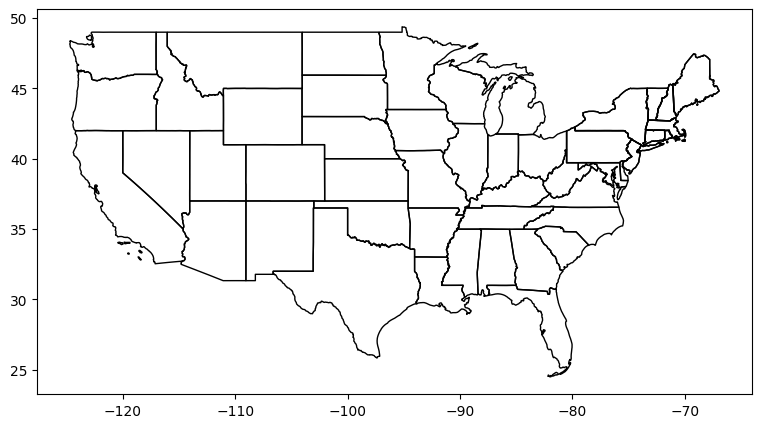

In [11]:
statedata.boundary.plot(figsize=(10,5), color='black',linewidth=1) #roughly plots the statedata dataframe to check that it appears how it should

# Plotting the Observed Tornado Data and Subjective Risk Data 

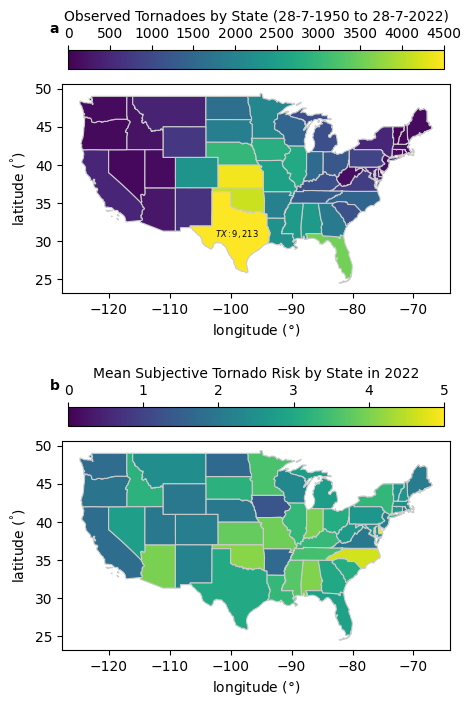

In [12]:
draft = False #so that it'll ignore saving the figures until we change it to False, but will plot a box around the edge of the figure so we can see it

fig01, (ax01,ax02) = plt.subplots(2, figsize=(5,8.5)) #sets up the subplot figure and the two axes, this does it with ax01 above ax02


#plotting the observed tornado count by state
var01 = geostates_count_merged['tor_count'] #sets variable to be plotted
vmin01, vmax01 = 0, 4500 #sets the min and max for the colourbar

p01 = geostates_count_merged.plot(column=var01, linewidth=0.8, ax=ax01, edgecolor='0.8', #plotting the observed tornado data for each state on the map
                                 cmap='viridis',vmin=vmin01,vmax=vmax01,legend=True, legend_kwds={"location":"top","shrink":.97, "label": "Observed Tornadoes by State (28-7-1950 to 28-7-2022)", "orientation": "horizontal"}, rasterized=True) #within this plot, setting up the things for the colourbar 
ax01.text(-99,31,'$TX: 9,213$',ha='center',va='center', size = 6) #plotting the text to label the value for TX since it's so off the chart
ax01.text(0.1, 0.87, "a", weight='bold', transform=fig01.transFigure) #ploting the text to label the left subplot as figure a


ax01.set_xlabel('longitude ($\\degree$)') #setting the x-label 
ax01.set_ylabel('latitude ($^\\degree$)') #setting the y-label


#plotting subjective tornado risk 
var02 = geostates_risk_merged['risk_tor'] #sets the variable to be plotted
vmin02, vmax02 = 0, 5 #sets the min and max for the colourbar
geostates_risk_merged.plot(column=var02, linewidth=0.8, ax=ax02, edgecolor='0.8', cmap='viridis', #plotting the mean subjective tornado risk for each state on the map
                           vmin=vmin02,vmax=vmax02,legend=True,legend_kwds={"location":"top","shrink":.97,"label": "Mean Subjective Tornado Risk by State in 2022", "orientation": "horizontal"}, rasterized=True) #within this plot, setting up the things for the colourbar

ax02.text(0.1, 0.45, "b", weight='bold', transform=fig01.transFigure) #ploting the text to label the left subplot as figure a


ax02.set_xlabel('longitude ($\\degree$)') #setting the x-label
ax02.set_ylabel('latitude ($^\\degree$)') #setting the y-label



fig01.set_size_inches(5,8.5,forward=True) #forward=True means forward on this information to the saving information as well
if draft==False:
    fig01.savefig('observed_vs_sub_risk.png', format='png', dpi=300)

# Plotting the Scatter Plot of Observations against Subjective Risk

In [13]:
#finding the exact values in the data for the states of Delaware (index 8) and Texas (index 49)
print(
    var01[8],
    var01[49],
    var02[8],
    var02[49])

69 9233 5.0 3.0162602


In [14]:
st_name = sub_tor_risk['stateabbr'] #sets variable st_name to be the state abbreviation so those pieces of text can be called for the scatter plot

print( #prints the two state abbreviations we want to check their indecies
    st_name[7],
    st_name[41])

DE TX


In [15]:
y = [69,9233] #creates a new list, y, containing the tor_count data for DE and TX
z = [5.0,3.0162602] #similarly creates a new list, z, containing the risk_tor data for DE and TX
n = [st_name[7],st_name[41]] #similarly creates a new list, n, containing the text for the necessary state abbreviations

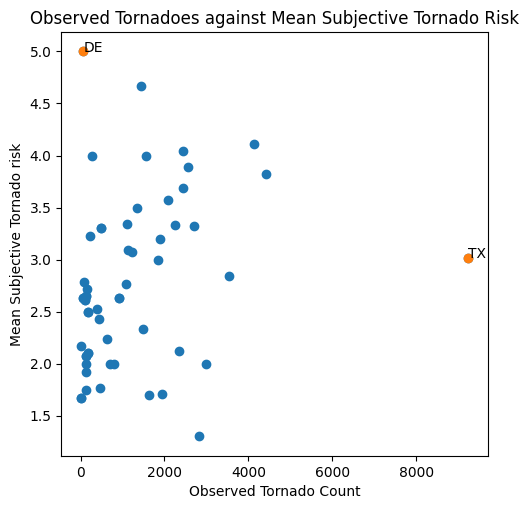

In [16]:
fig02, ax03 = plt.subplots(figsize=(5.5,5.5)) #sets the subplot, size, and axis for the scatterplot

fig02 = plt.scatter(geostates_count_merged['tor_count'],geostates_risk_merged['risk_tor']) #plotting a comparison of tornado count (x-axis) and the subjective tornado risk

ax03.scatter(y,z)

plt.title('Observed Tornadoes against Mean Subjective Tornado Risk')
plt.xlabel('Observed Tornado Count')
plt.ylabel('Mean Subjective Tornado risk')


for i, txt in enumerate(n): #plots the text of the state abbreviations in the n variable on to the scatter plot
    ax03.annotate(txt, (y[i], z[i]))

if draft==False:
    plt.savefig('scatter_observed_vs_sub_risk.png', format='png', dpi=300) #saves the figure